In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from biolearn.data_library import DataLibrary
from biolearn.model_gallery import ModelGallery

def pc(pc_df,hue):
    plt.figure(figsize=(3, 3))
    ax=sns.scatterplot(x='PC1', y='PC2', data=pc_df,hue=hue,palette = palette)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
data='/data/gladyshev/mm1286/data/'

In [38]:
man=pd.read_csv(data+'/aging-genes/man_e1.csv',index_col=0,usecols=['IlmnID','g','ch','pos','dis','gene'])

In [160]:
wb = DataLibrary().get("GSE112618").load()

In [2]:
%%time
mat='/data/gladyshev/mm1286/data/ref/cell_comp/GSE110554_series_matrix.txt'
meta1=pd.read_table(mat,nrows=10**2,skiprows=38,index_col=0).iloc[13].str.strip('cell type: ').drop(['GSM2998097','GSM2998106'])
meta2=pd.read_table(mat,nrows=10**2,skiprows=38,index_col=0)[['GSM2998097','GSM2998106']].iloc[14].str.strip('cell type: ')
meta=pd.concat([meta1,meta2])
meta=meta[meta!='MIX']
dnam=pd.read_table(mat,nrows=10**6,skiprows=38+59,index_col=0)
dnam=dnam.drop('!series_matrix_table_end')

CPU times: user 16.1 s, sys: 2.97 s, total: 19.1 s
Wall time: 27.4 s


In [133]:
meta=pd.concat([meta,pd.Series('WB',index=wb.dnam.columns)])

In [151]:
cd19=man[man['gene']=='CD19'][['pos']].sort_values('pos')
cd19=cd19.join(dnam).join(wb.dnam)

In [176]:
cd19.loc['cg14102807'].pos

28932355.0

In [147]:
cd19.index=cd19['pos']
cd19=cd19.drop('pos',axis=1).T.join(meta.rename('cell'))

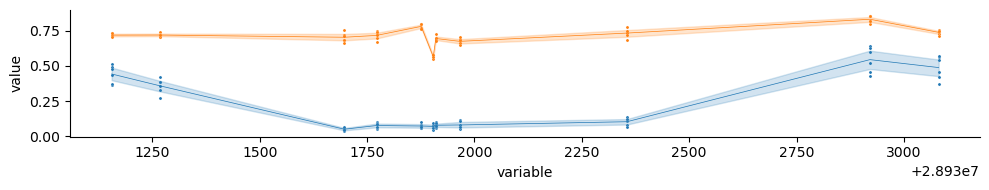

In [142]:
plm=cd19.melt('cell')
g = sns.FacetGrid(plm[plm['cell'].isin(['B','WB'])], hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);

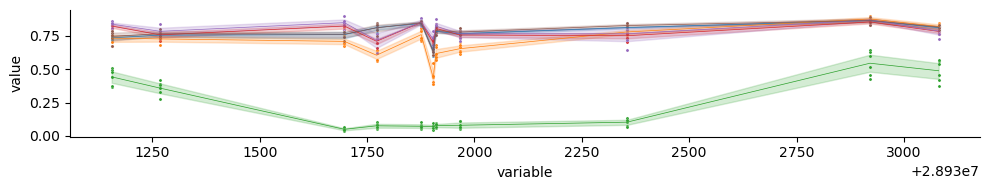

In [144]:
plm=cd19
g = sns.FacetGrid(plm[plm['cell']!='WB'], hue='cell',height=2, aspect=5, )
g.map(sns.scatterplot, "variable", "value",s=5)
g.map(sns.lineplot, "variable", "value",linewidth = .5);

In [ ]:
dd=df-wb.dnam.median()

In [195]:
wbd=wb.dnam.T[cd19.index[3:-1]]

In [202]:
cd19.index[3:-1]

Index(['cg06323049', 'cg27565966', 'cg10571406', 'cg05433111', 'cg01758575',
       'cg14102807', 'cg17248408'],
      dtype='object', name='IlmnID')

In [196]:
wbd['m']=wbd.median(1)

In [198]:
(1-wbd).join(wb.metadata[['bcell_proportion']]).sort_values('bcell_proportion')

,cg06323049,cg27565966,cg10571406,cg05433111,cg01758575,cg14102807,cg17248408,m,bcell_proportion
GSM3074480,0.254208,0.204630,0.431194,0.299859,0.311013,0.222964,0.148515,0.254208,0.01772118
GSM3074484,0.260512,0.202049,0.424067,0.273958,0.296548,0.253097,0.143373,0.260512,0.039635017
GSM3074482,0.271343,0.204949,0.419051,0.315959,0.314434,0.266662,0.148588,0.271343,0.042616993
GSM3074481,0.301971,0.228606,0.439964,0.303209,0.338908,0.256560,0.181889,0.301971,0.047810635
GSM3074485,0.279059,0.237290,0.438908,0.319420,0.351969,0.318677,0.183934,0.318677,0.059132822
GSM3074483,0.331607,0.236633,0.453171,0.318509,0.339293,0.281577,0.203048,0.318509,0.066199561


CPU times: user 992 ms, sys: 40.1 ms, total: 1.03 s
Wall time: 1.87 s


<Axes: xlabel='PC1', ylabel='PC2'>

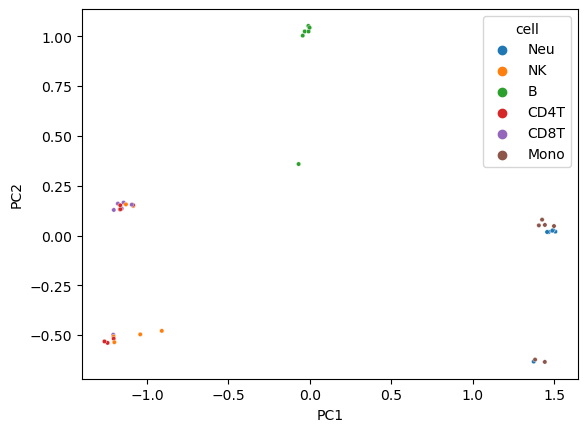

In [198]:
%%time
st=dd.std().sort_values().tail(10).index
palette = sns.color_palette("coolwarm", as_cmap=True)

pca = PCA(n_components=2)
pc_df = pd.DataFrame(pca.fit_transform(dd[st]),
                                    columns=['PC1', 'PC2'],index=dd.index);
sns.scatterplot(data=pc_df, x='PC1', y='PC2', s=10, hue=cells)

<Axes: xlabel='PC1', ylabel='PC2'>

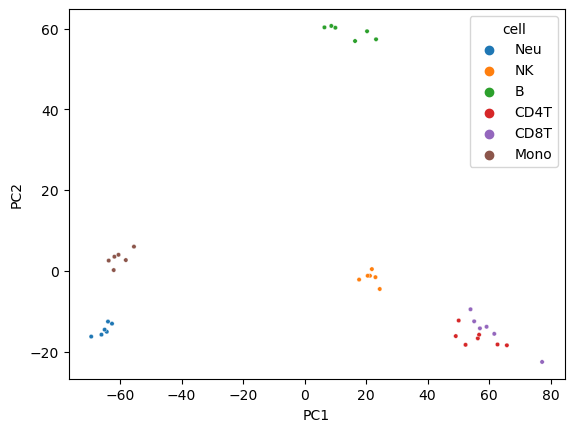

In [39]:
df['T']=df[['CD4T','CD8T']].median(1)
df.drop(['CD4T','CD8T'],axis=1,inplace=True)

In [83]:
for c in df.columns:
    df[c]=df[c]-reference_dataset.dnam.median(1)

In [89]:
palette = sns.color_palette("coolwarm", as_cmap=True)

pca = PCA(n_components=3)
pc_df = pd.DataFrame(pca.fit_transform(df),
                                    columns=['PC1', 'PC2','PC3'],index=df.index)
pc_df=pc_df.join(df)

<Axes: xlabel='PC1', ylabel='PC2'>

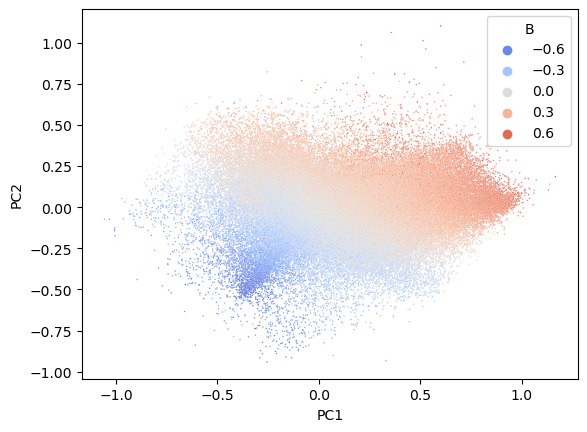

In [90]:
sns.scatterplot(x='PC1', y='PC2', hue='B',data=pc_df,palette = palette, s=1)

<Axes: xlabel='PC1', ylabel='PC2'>

/PHShome/mm1286/anaconda3/envs/p311/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/PHShome/mm1286/anaconda3/envs/p311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


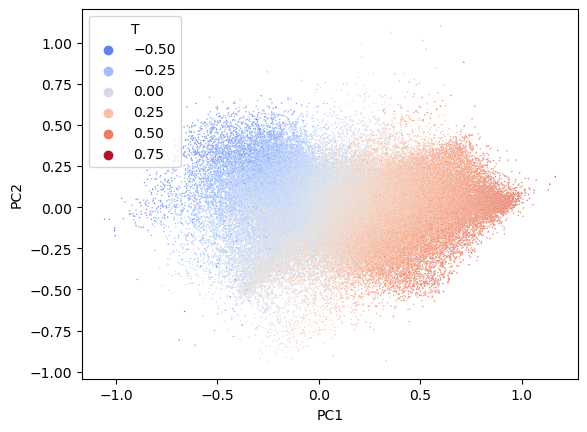

In [91]:
sns.scatterplot(x='PC1', y='PC2', hue='T',data=pc_df,palette = palette, s=1)

In [96]:
cf=pc_df.head(1000000)

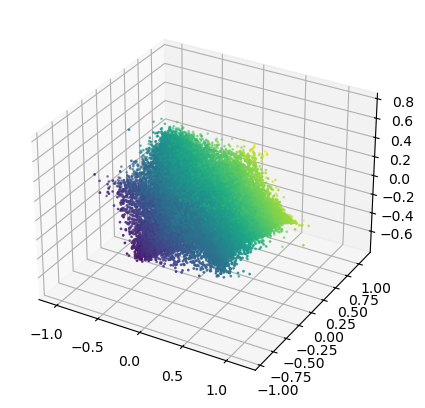

In [97]:
fig = plt.figure(figsize=(5,5))
pl = fig.add_subplot(111, projection='3d')
pl.scatter(cf['PC1'],cf['PC2'],cf['PC3'], 
            c=cf['B'],s=1)

In [98]:
pc_df.corr()

,PC1,PC2,PC3,B,Mono,NK,Neu,T
PC1,1.000000e+00,3.908189e-17,1.034304e-16,0.694431,-0.383709,0.775069,-0.680825,0.907027
PC2,3.908189e-17,1.000000e+00,-2.721189e-16,0.618573,0.723049,0.089087,0.390350,-0.243999
PC3,1.034304e-16,-2.721189e-16,1.000000e+00,0.346766,-0.317000,-0.590164,-0.246238,0.034883
B,6.944307e-01,6.185734e-01,3.467661e-01,1.000000,0.013321,0.412937,-0.306291,0.454698
Mono,-3.837087e-01,7.230492e-01,-3.169997e-01,0.013321,1.000000,-0.134692,0.534353,-0.408960
NK,7.750691e-01,8.908680e-02,-5.901641e-01,0.412937,-0.134692,1.000000,-0.364075,0.591568
Neu,-6.808249e-01,3.903499e-01,-2.462383e-01,-0.306291,0.534353,-0.364075,1.000000,-0.652930
T,9.070269e-01,-2.439994e-01,3.488271e-02,0.454698,-0.408960,0.591568,-0.652930,1.000000


In [10]:
sal=ModelGallery().get("DeconvoluteBloodEPIC").predict(reference_dataset)

Estimating cell proportions using 'EPIC' platform reference...
Number of CpGs in reference: 600
Number of CpGs in methylation data intersecting with reference CpGs: 600
Running deconvolution...
Deconvolution complete!


In [ ]:
sal

,GSM3074480,GSM3074481,GSM3074482,GSM3074483,GSM3074484,GSM3074485
neutrophil,0.628561,0.485662,0.692731,0.402909,0.704129,0.442868
nk_cell,0.003215,0.057893,0.013019,0.033238,0.016283,0.032167
b_cell,0.008464,0.049882,0.044065,0.077114,0.034580,0.060856
cd4_t_cell,0.205578,0.182483,0.100740,0.269972,0.093419,0.154430
cd8_t_cell,0.072361,0.152587,0.070950,0.148527,0.078764,0.192139
monocyte,0.081821,0.071494,0.078494,0.068241,0.072825,0.117540


In [12]:
reference_dataset.metadata

,sample_well,chip,sex,age,array,slide,cd4t_proportion,cd8t_proportion,nk_proportion,bcell_proportion,monocytes_proportion,granulocytes_proportion,neutrophils_proportion
id,,,,,,,,,,,,,
GSM3074480,B01,1,2,54.0,R02C01,404327060012/2,0.181738794,0.061719145,0.019415308,0.01772118,0.061406893,0.590642372,0.534332
GSM3074481,C01,1,2,34.0,R03C01,404327060012/2,0.181012751,0.098584369,0.047482283,0.047810635,0.05205543,0.465698888,0.435131
GSM3074482,D01,1,2,33.0,R04C01,404327060012/2,0.119645952,0.05866101,0.027510185,0.042616993,0.060388516,0.661889432,0.650903
GSM3074483,F01,1,2,34.0,R06C01,404327060012/2,0.243650764,0.123119159,0.02456598,0.066199561,0.054881227,0.399642766,0.342468
GSM3074484,G01,1,1,46.0,R07C01,404327060012/2,0.11003834,0.047160888,0.026188677,0.039635017,0.059569858,0.678296954,0.640848
GSM3074485,H01,1,2,56.0,R08C01,404327060012/2,0.1619252,0.152631535,0.048088244,0.059132822,0.086664369,0.440635471,0.375769


In [14]:
reference_dataset.dnam

,GSM3074480,GSM3074481,GSM3074482,GSM3074483,GSM3074484,GSM3074485
id,,,,,,
cg00000029,0.394609,0.499356,0.420688,0.511384,0.423383,0.475624
cg00000103,0.820814,0.868471,0.877737,0.881063,0.841882,0.885243
cg00000109,0.877917,0.837191,0.849179,0.797947,0.822006,0.879849
cg00000155,0.887997,0.889705,0.894313,0.911488,0.917205,0.906420
cg00000158,0.908412,0.906269,0.924033,0.904923,0.903638,0.894823
...,...,...,...,...,...,...
ch.X.97129969R,0.052833,0.029799,0.039415,0.049626,0.035136,0.033918
ch.X.97133160R,0.060246,0.068864,0.066268,0.034380,0.045261,0.061242
ch.X.97651759F,0.015845,0.023144,0.027239,0.023470,0.029015,0.023601
